## Instituto Tecnologico de Costa Rica
## Escuela de Computacion 
## Curso: Inteligencia Artificial
## Profesor: Luis Alexander Calvo
## Estudiantes: 
   - Josue Andrey Rojas Vega 2019042245
   - Andrew Gutierrez Castro 2019XXXXXX

### Objetivo

Implementar un programa en python usando numpy y librerias para manejo de imagenes para calcular el SVD y aplicar modificaciones en la imagen dada

Tareas a realizar:

1. Importacion de librerias necesarias

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

2. Carga de la imagen dada

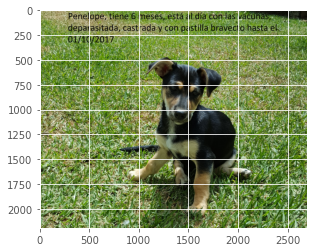

In [2]:
nombreImagen= "imagenUsar"
plt.style.use('ggplot')

image = Image.open(nombreImagen+'.jpg')

plt.imshow(image)
plt.show()

3. Carga de la matriz dada la imagen

In [6]:
A = np.asarray(image)
original_shape = A.shape
print(original_shape) # forma de la matriz resultante

(2193, 2697, 3)


In [15]:
A[0, :10] # mostrando los primeros 10 valores de la fila 0 de la matriz de la imagen

array([[142, 143,  83],
       [148, 149,  89],
       [157, 156,  99],
       [150, 149,  92],
       [132, 131,  75],
       [104, 103,  47],
       [ 87,  86,  30],
       [ 82,  81,  25],
       [100,  99,  43],
       [109, 108,  52]], dtype=uint8)